<a href="https://colab.research.google.com/github/Akash671/python-project/blob/master/imageclassifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)'''


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [ ]:
'''fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
'''

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
@@@@@@@@@@@@@@@@@@@@...........Explore the data..............@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)


(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [ ]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)


(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


In [ ]:
@@@@@@@@@@@@@@@@@@@@@@@@@@ .........Preprocess the data...........@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
'''plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
'''

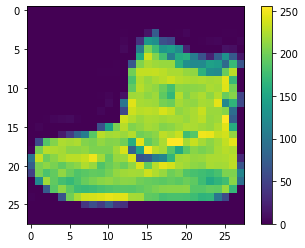

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
'''Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:
train_images = train_images / 255.0

test_images = test_images / 255.0
'''

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
'''To verify that the data is in the correct format and that you're
 ready to build and train the network, let's display the first 25 images from the 
training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
'''


No Python documentation found for 'plt.xticks()'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



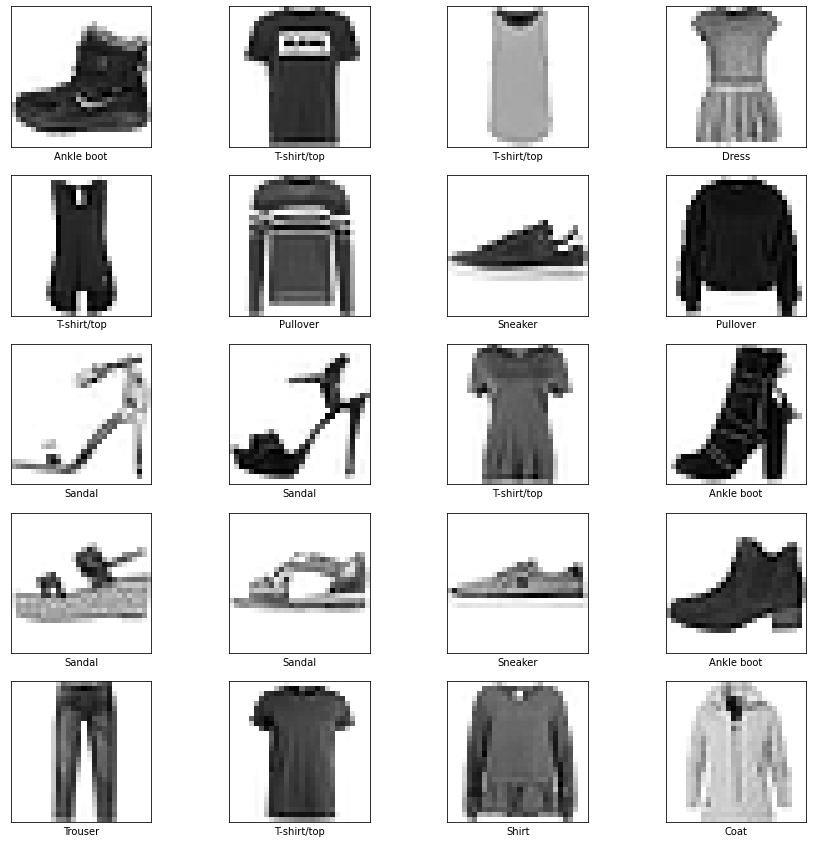

In [ ]:
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
####################      Build the model         #################


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
#Compile the mode

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Train the model

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4975 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3728 - accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3149 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2816 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2499 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [ ]:
#Evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc*100,"%")


313/313 - 0s - loss: 0.3439 - accuracy: 0.8810

Test accuracy: 88.09999823570251 %


In [ ]:
# make prediction

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [ ]:
predictions = probability_model.predict(test_images)


In [ ]:
predictions[0]

array([8.57296982e-07, 4.53751203e-11, 1.12829024e-10, 3.07254533e-09,
       5.47228796e-09, 2.08251164e-04, 1.54427994e-06, 3.81154264e-03,
       4.88915797e-09, 9.95977819e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]


9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


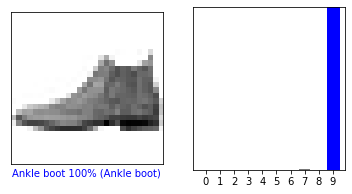

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


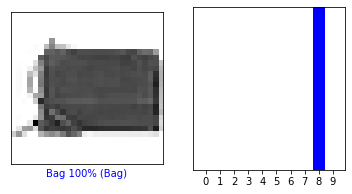

In [ ]:
i = 18
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
